In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
'''
col=[]
for i in range(100):
    col.append(i+1)
col.append('y')  
r=[]
for i in range(10000):
    r.append('x'+str(i+1))

'''
df=pd.read_csv("A2Q2Data_train.csv")
#df.index=r


#Ridge regression
#df.columns
#data=df.to_numpy()
#print(data.shape)
#X=data[:,:100]
#X=X.T

#Y=data[:,-1]
#print(Y.shape)
#print(X.shape)

#df.head()


In [4]:
#Cross Validation

#randomizing data
df= df.reindex(np.random.permutation(df.index))
#print(df.head())

#reset data
df= df.reset_index(drop=True)
#print(df.head())

#folds                                                              
train = df.loc[0:7999]                                            
test = df.loc[8000:9999]

In [13]:
#def obj_fun(p1):
#    return np.linalg.norm(p1-w_ml)

#print(g.shape)
#print(g)

def grad_desc(train,Lambda):
    
    data=train.to_numpy()
    X_g=data[:,:100]
    Y_g=data[:,-1]
    w=np.array([0 for i in range(100)])
    #print(w)
    T=1000
    t=1 
    #w_his=w
    #obj_his=obj_fun(w)
    delta_w = np.zeros(w.shape)
    while(t<T):
        n=0.1/t
        #print(grad_fun(w))
        delta_w = -(2*n/10000)*(((X_g.T)@(np.dot(X_g,w.T)-Y_g))+((Lambda*(np.identity(100,dtype=float)))@(w.T)))
        #print(delta_w)
        w = w+delta_w

        #w_his = np.vstack((w_his,w))
        #obj_his = np.vstack((obj_his,obj_fun(w)))
        t+=1

    #print(obj_his.shape)
    #print(w_his.shape)
    #print(obj_his[-1])
    
    return w
    

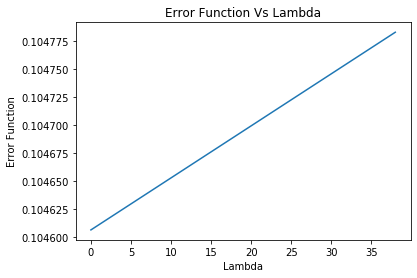

[0.10460617246110929, 0.10461083187375642, 0.10461549127608351, 0.10462015066809073, 0.10462481004977822, 0.10462946942114623, 0.10463412878219479, 0.10463878813292404, 0.10464344747333426, 0.10464810680342551, 0.10465276612319804, 0.1046574254326519, 0.10466208473178724, 0.10466674402060422, 0.10467140329910317, 0.104676062567284, 0.10468072182514696, 0.10468538107269217, 0.10469004030991994, 0.10469469953683022, 0.10469935875342323, 0.10470401795969915, 0.10470867715565813, 0.10471333634130034, 0.10471799551662592, 0.10472265468163501, 0.1047273138363277, 0.10473197298070423, 0.10473663211476472, 0.10474129123850935, 0.10474595035193832, 0.10475060945505162, 0.10475526854784965, 0.10475992763033233, 0.10476458670249991, 0.10476924576435245, 0.10477390481589034, 0.10477856385711345, 0.10478322288802218]


In [14]:
e=[]
     
#cross=[]

def test_d(wr,test,l):
    data=test.to_numpy()
    e=np.array(wr)
    X_g=data[:,:100]
    Y_g=data[:,-1]
    #print('error test',np.dot(X_g,e.T))
    #print('y test',Y_g)
    error=(np.linalg.norm((np.dot(X_g,e.T))-Y_g)+(l*np.linalg.norm(e)))
    return error

l=0.1
L=4
while l<L:
    w_r=[]
    w_r.append(grad_desc(train,l))
    e.append(test_d(w_r,test,l))
    l=l+0.1
#print('optimal w',w_r)
    #cross.append(sum(e)/len(e))
    #print(len(e))
    #w_r.clear()
    #e.clear()
    
    
    
    
x = np.arange(len(e))
c=np.array(e)#print(x_axis)
plt.plot(x,c)
plt.xlabel('Lambda')
plt.ylabel('Error Function')
plt.title('Error Function Vs Lambda')
    

plt.show()        
 
print(e)
#print(cross)
#print(w_r)    